Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.loc[(df['fraud_reported'] == 'Y')]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
14,180,38,644081,28-12-1998,OH,250/500,2000,1301.13,0,476685,...,YES,46200,4200,8400,33600,Dodge,Neon,2003,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,234,41,291006,16-05-1990,IN,100/300,500,951.56,0,455426,...,?,98280,15120,7560,75600,Chevrolet,Tahoe,2007,Y,NaN
977,266,42,929306,06-03-2003,IN,100/300,500,1093.83,4000000,468454,...,NO,53280,4440,8880,39960,Suburu,Impreza,2015,Y,NaN
982,230,43,490514,09-02-2007,IN,500/1000,2000,1101.83,0,451529,...,YES,51900,5190,10380,36330,BMW,M5,2011,Y,NaN
986,232,42,182953,30-04-2013,IN,100/300,500,944.03,0,440153,...,?,77000,15400,7700,53900,Toyota,Highlander,2015,Y,NaN


In [5]:
df.apply(lambda i:len(i.unique()))

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
df.drop('_c39',axis=1,inplace=True)

In [8]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Our Dataset contains ? we have to replace it with null

In [10]:
df=df.replace('?',np.nan)

In [11]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [12]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [13]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [14]:
df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [15]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [16]:
## We have repalce the collision type with the mode value
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])
## We have replace the property damage info as no for nan values                                                  
df['property_damage']=df['property_damage'].replace(np.nan,'NO')
## We also repalce NO with nan values where police report had ? in our dataset.                                                 
df['police_report_available']=df['police_report_available'].replace(np.nan,'NO')

In [17]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<AxesSubplot:title={'center':'Heatmap of null values'}>

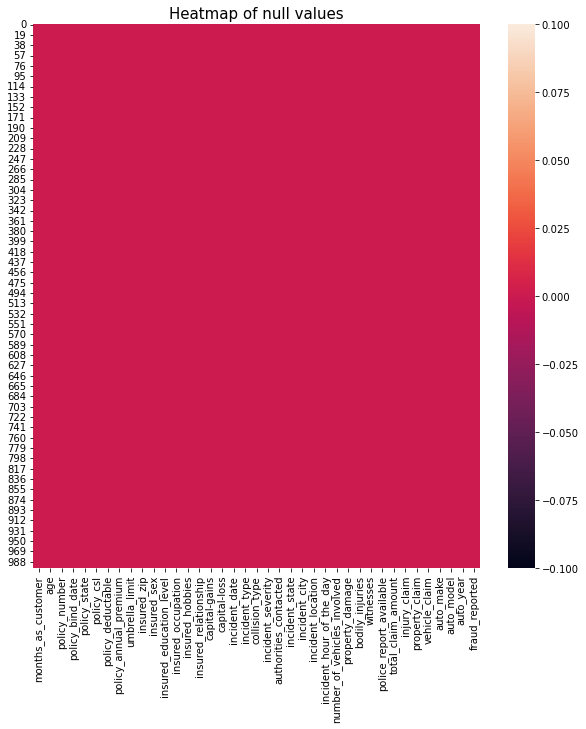

In [18]:
plt.figure(figsize=(10,10))
plt.title('Heatmap of null values',fontsize=15)
sns.heatmap(df.isnull())

In [19]:
## Creating a new feature for vehicle age
df['vechicle_age']=2021-df['auto_year']

In [20]:
## let's delete unnecassary columns
df=df.drop(['policy_number','insured_zip','incident_location','auto_year','policy_bind_date','policy_state','incident_date'],axis=1)

In [21]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,vechicle_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,15.897000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,6.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,11.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,16.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,21.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,26.000000


Observation:

1-Policy_deductable,injury_claim,property_claim are right skewed because mean value is greater than median value.

2-Months_as_customer,umbrella_limit,capital_gains,injury_claim,property_claim contain zero as a miminum values.

3-Vehicle_claim,total_claim_amount,captial_gains are left skewed in nature.

# Data Visulization

<AxesSubplot:title={'center':'Fraud Value Counts'}, xlabel='fraud_reported', ylabel='count'>

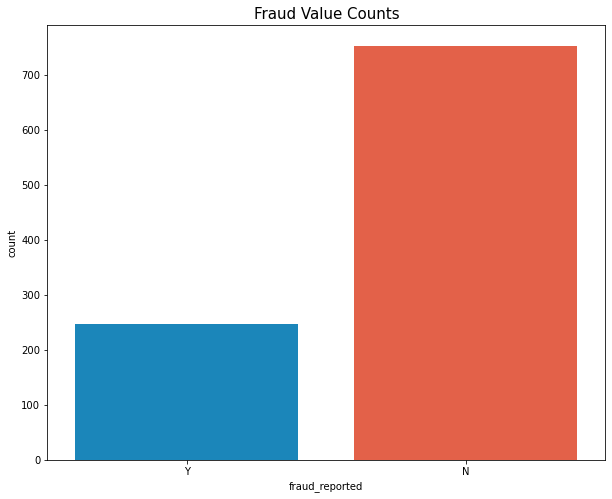

In [22]:
plt.figure(figsize=(10,8))
plt.title('Fraud Value Counts',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['fraud_reported'], data=df)

In [23]:
def value_count(df,col):
    plt.figure(figsize=(10,8))
    plt.title(col+' ---no of counts',fontsize=15)
    plt.style.use('fivethirtyeight')
    sns.countplot(df[col], data=df)

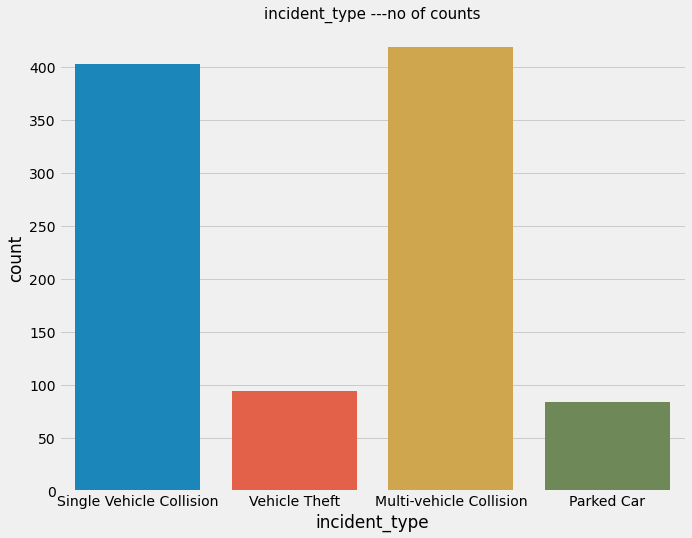

In [24]:
value_count(df,'incident_type')

observation:

1-In accident type, Multi vehicle collision is major issue.

2- Majority of insurance claimed for accidental vehicle. fer for theft vehicle.

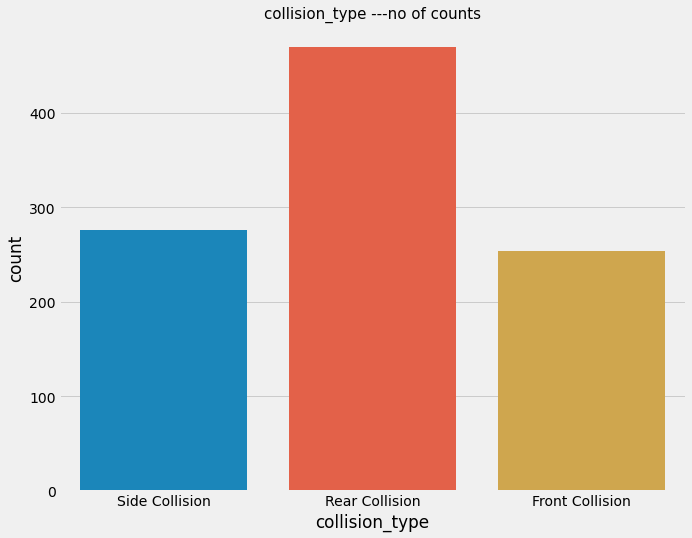

In [25]:
value_count(df,'collision_type')

1-for most of vehcile, the type of collision is Rear Collision.

2-Side collision & Front Collission are apporimatly same in our dataset.

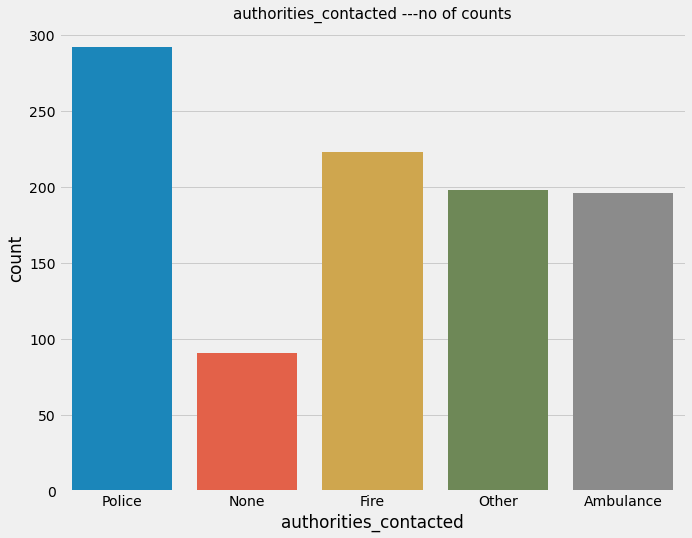

In [26]:
value_count(df,'authorities_contacted')

1- vehicle owner called to police first, In most of cases.

2-Fire after the collision may be a 2nd prime reason.

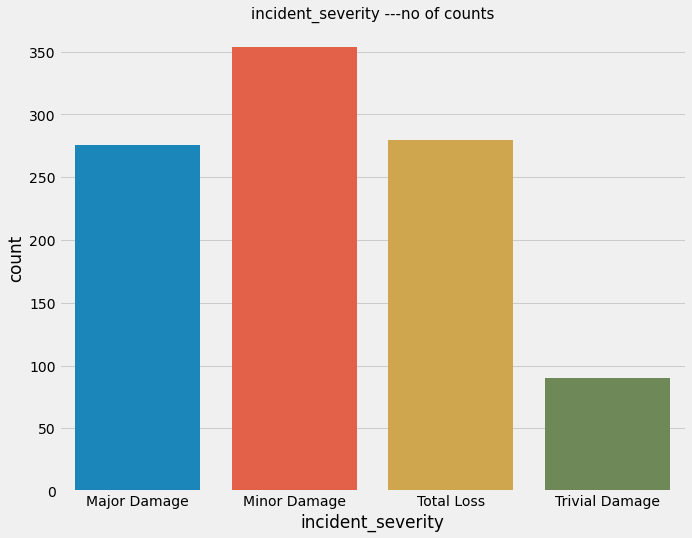

In [28]:
value_count(df,'incident_severity')

1-In most of insurance claim, the damage to vehicle is minor in nature.

2- Major damage vehicles are 280 in our dataset.

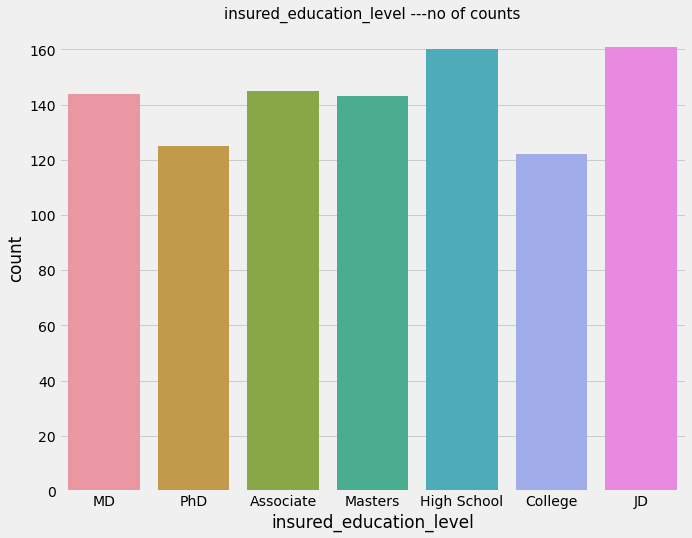

In [29]:
# # Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported
value_count(df,'insured_education_level')

High_school passout and JD persons who claimed for Insurance in our dataset.

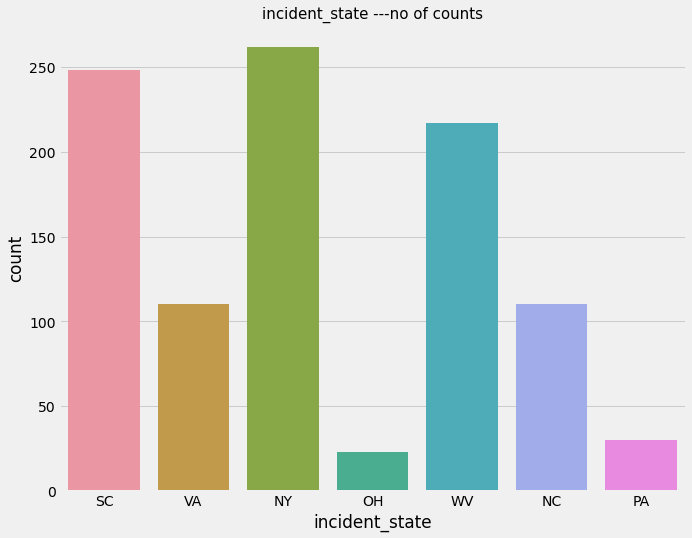

In [30]:
value_count(df,'incident_state')

Majority of accident spotted in NY followed by SC in USA.

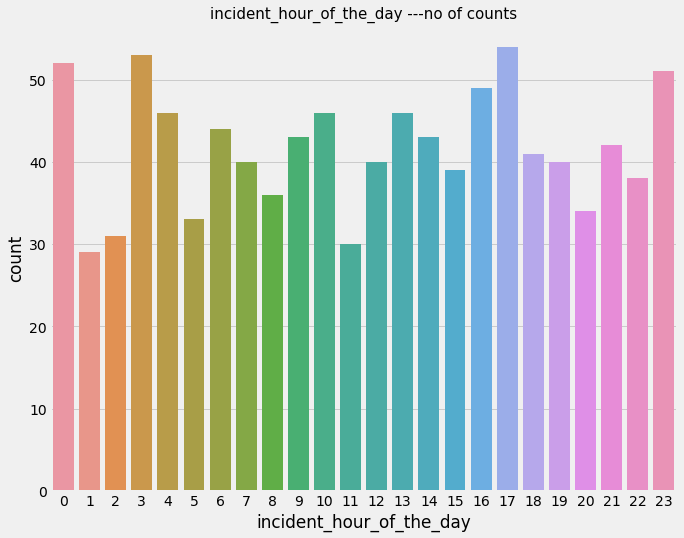

In [32]:
value_count(df,'incident_hour_of_the_day')

we can see apart from few Hrs in accidents are happening frequently in all seassons between 40 to 50

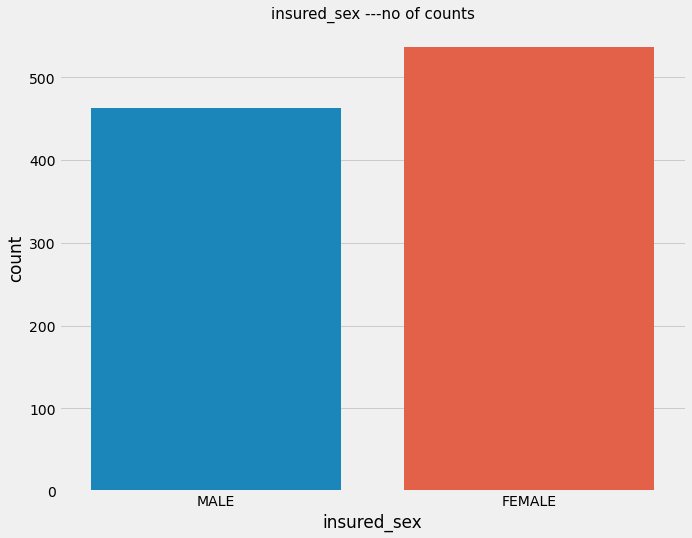

In [33]:
value_count(df,'insured_sex')

Females claims more than men for vehicle insurance.

# Visualization with target

<AxesSubplot:title={'center':'Collision type Vs Fraud Reported'}, xlabel='collision_type', ylabel='count'>

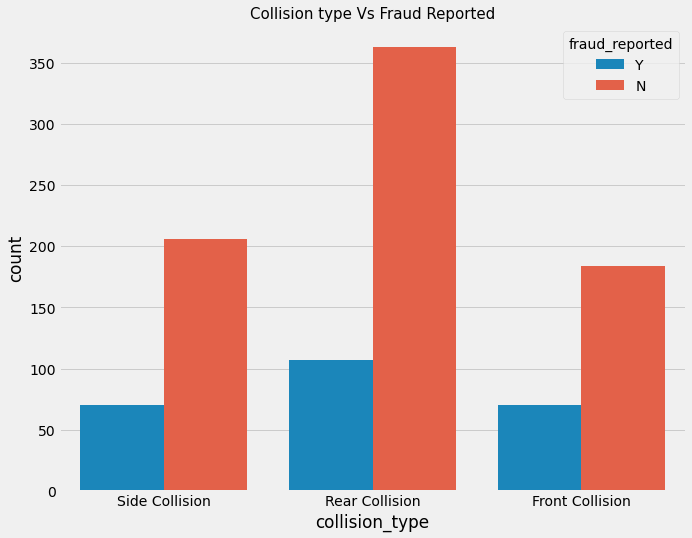

In [34]:
plt.figure(figsize=(10,8))
plt.title('Collision type Vs Fraud Reported',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['collision_type'],hue='fraud_reported',data=df)

We could see that in rear collision most genuine appicant claim for insurance cover. There is less froud reported in case of Rear collision

<AxesSubplot:title={'center':'incident_severity Vs Fraud Reported'}, xlabel='incident_severity', ylabel='count'>

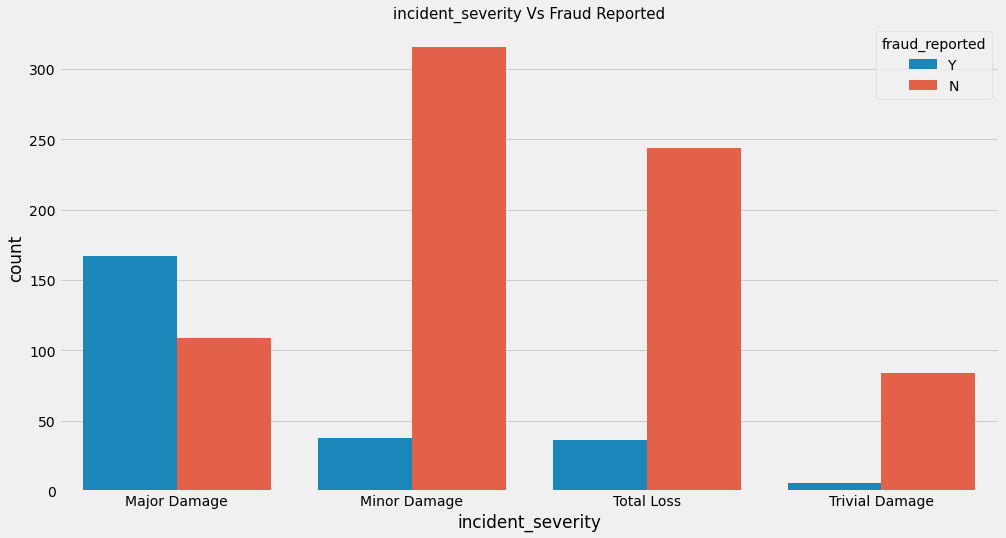

In [36]:
plt.figure(figsize=(15,8))
plt.title('incident_severity Vs Fraud Reported',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['incident_severity'],hue='fraud_reported',data=df)

1-In MAjor damage case most of Fraud insurance claims reported.

2-In minor case we could see very least cases reported to froud as compared to number of cases reported of minor damage.

3- In trivial damage, lowest fraud reported.

# Distribution

In [37]:
df_n=df.select_dtypes(exclude='object')

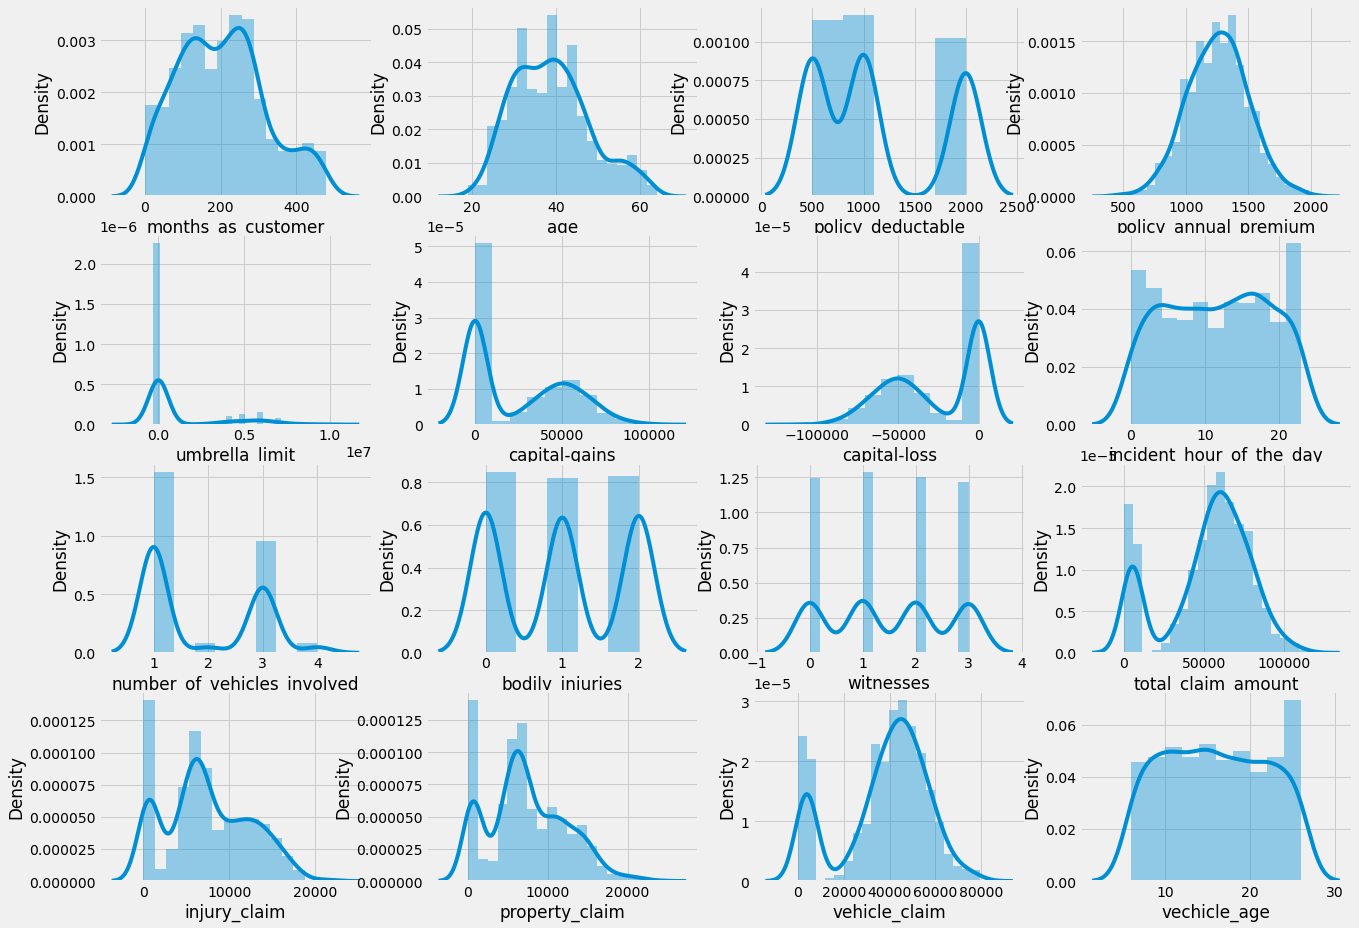

In [38]:
plt.figure(figsize=(20,15))
plot=1
for i in df_n:
    if plot<=16:
        plt.subplot(4,4,plot)
        sns.distplot(df[i])
        plot=plot+1

# Outliers

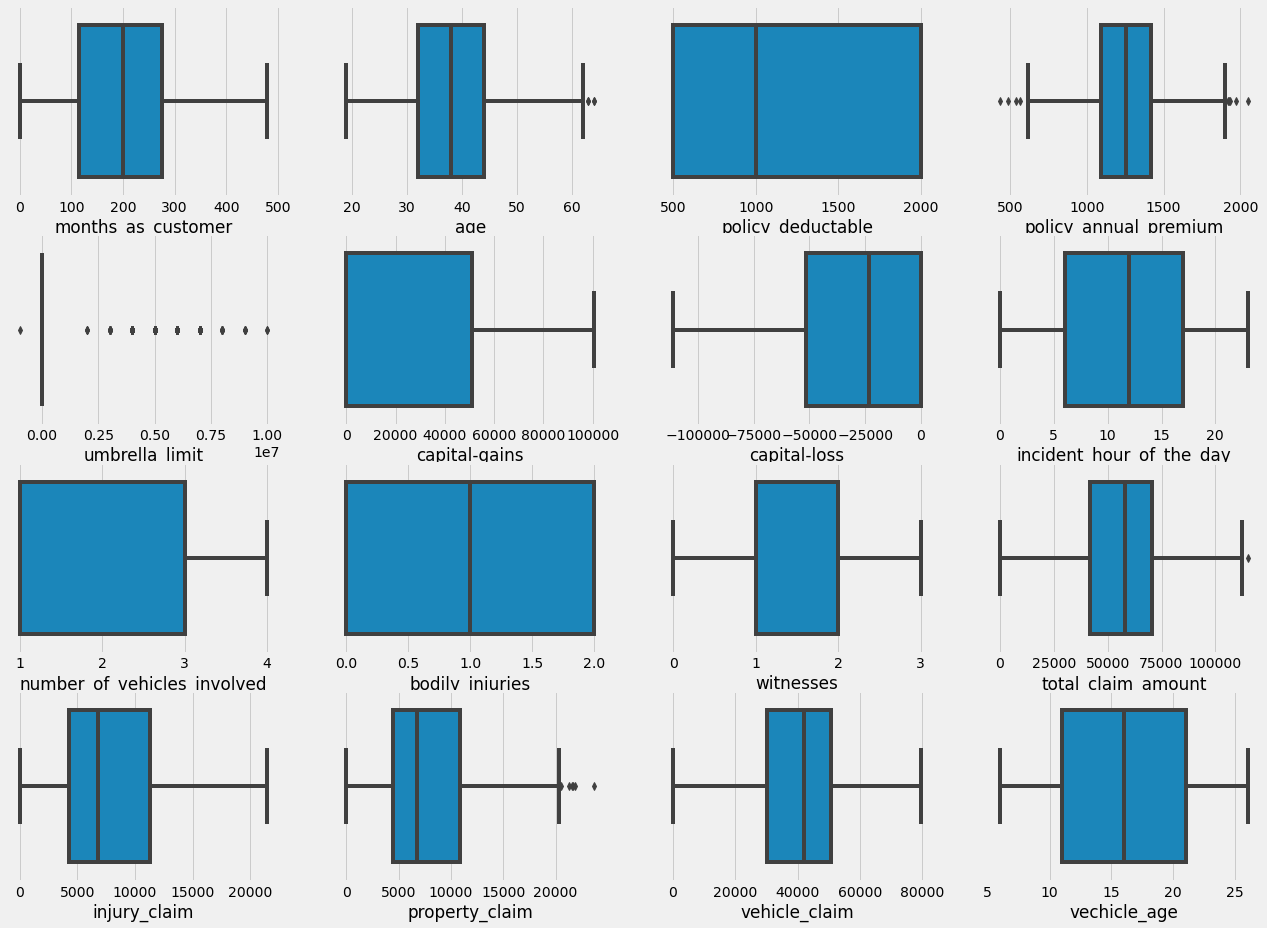

In [39]:
plt.figure(figsize=(20,15))
plot=1
for i in df_n:
    if plot<=16:
        plt.subplot(4,4,plot)
        sns.boxplot(df[i])
        plot=plot+1

We can see outliers in age,policy_annual_premium,umbrella_unit,total_claim_amount,property_claim,fraud_reported.

In [40]:
IQR=df.age.quantile(0.75) - df.age.quantile(0.25)
lowerbridge = df['age'].quantile(0.25)-(IQR*1.5)
upperbridge = df['age'].quantile(0.75)+(IQR*1.5)
print('Lower bridge is',lowerbridge)
print('Upper bridge is',upperbridge)

Lower bridge is 14.0
Upper bridge is 62.0


In [41]:
data = df.copy()

In [42]:
data.loc[df['age']>62,'age'] = 62
data.loc[df['age']<14,'age'] = 14

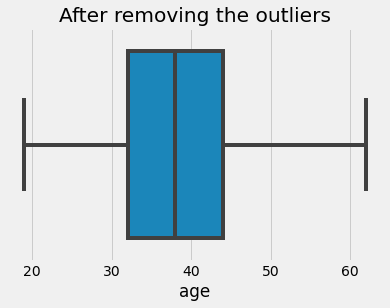

In [43]:
sns.boxplot(data['age'])
plt.title('After removing the outliers')
plt.show()

In [44]:
IQR=df.policy_annual_premium.quantile(0.75) - df.policy_annual_premium.quantile(0.25)
lowerbridge = df['policy_annual_premium'].quantile(0.25)-(IQR*1.5)
upperbridge = df['policy_annual_premium'].quantile(0.75)+(IQR*1.5)
print('Lower bridge is',lowerbridge)
print('Upper bridge is',upperbridge)

Lower bridge is 600.4762499999999
Upper bridge is 1904.8262500000003


In [45]:
data.loc[df['policy_annual_premium']>1904.8262499999996,'policy_annual_premium'] = 1904.8262499999996
data.loc[df['policy_annual_premium']<600.4762500000003,'policy_annual_premium'] = 600.4762500000003

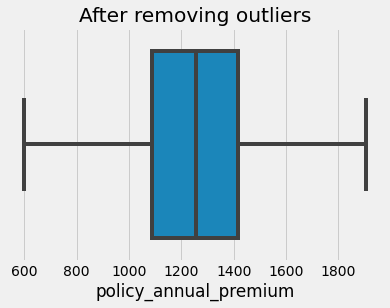

In [46]:
sns.boxplot(data['policy_annual_premium'])
plt.title('After removing outliers')
plt.show()

In [47]:
IQR = df.umbrella_limit.quantile(0.75) - df.umbrella_limit.quantile(0.25)
lowerbridge = df['umbrella_limit'].quantile(0.25) - (IQR*1.5)
upperbridge = df['umbrella_limit'].quantile(0.75) + (IQR*1.5)
print('Lowerbridge is',lowerbridge)
print('Upperbridge is',upperbridge)

Lowerbridge is 0.0
Upperbridge is 0.0


In [48]:
data.loc[df['umbrella_limit']>0,'umbrella_limit'] = 0
data.loc[df['umbrella_limit']<0,'umbrella_limit'] = 0

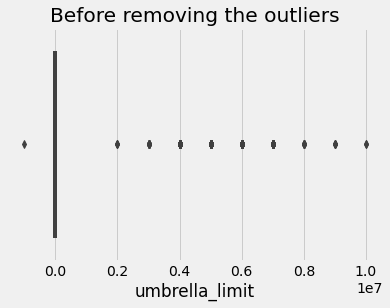

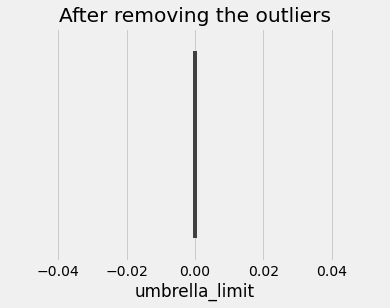

In [49]:
sns.boxplot(df['umbrella_limit'])
plt.title('Before removing the outliers')
plt.show()

sns.boxplot(data['umbrella_limit'])
plt.title('After removing the outliers')
plt.show()

In [50]:
IQR = df.total_claim_amount.quantile(0.75) - df.total_claim_amount.quantile(0.25)
lowerbridge=df['total_claim_amount'].quantile(0.25)-(IQR*1.5)
upperbridge=df['total_claim_amount'].quantile(0.75)+(IQR*1.5)
print('Lower bridge is',lowerbridge)
print('Upper bridge is',upperbridge)

Lower bridge is -1357.5
Upper bridge is 113762.5


In [51]:
data.loc[df['total_claim_amount']>113762.5,'total_claim_amount'] =  113762.5

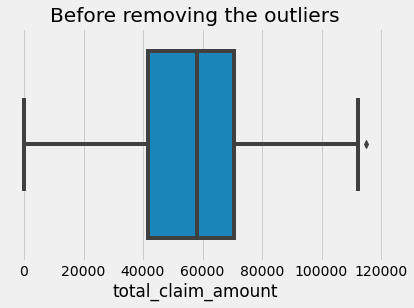

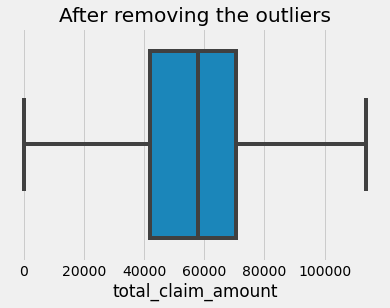

In [52]:
sns.boxplot(df['total_claim_amount'])
plt.title('Before removing the outliers')
plt.show()

sns.boxplot(data['total_claim_amount'])
plt.title('After removing the outliers')
plt.show()

In [53]:
IQR=df.property_claim.quantile(0.75) - df.property_claim.quantile(0.25)
lowerbridge = df['property_claim'].quantile(0.25)-(IQR*1.5)
upperbridge = df['property_claim'].quantile(0.75)+(IQR*1.5)
print('Lower bridge is',lowerbridge)
print('Upper bridge is',upperbridge)

Lower bridge is -5215.0
Upper bridge is 20545.0


In [54]:
data.loc[df['property_claim']>20545,'property_claim'] = 20545

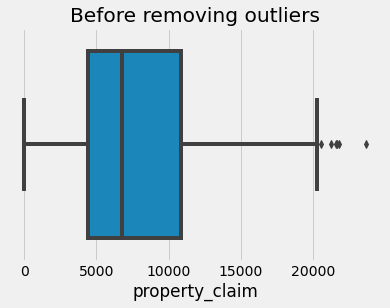

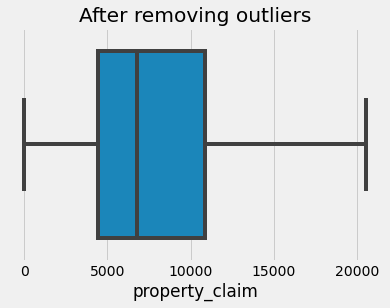

In [55]:
sns.boxplot(df['property_claim'])
plt.title('Before removing outliers')
plt.show()

sns.boxplot(data['property_claim'])
plt.title('After removing outliers')
plt.show()

In [56]:
df=data

# Label Encoder

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df:
    df[i]=le.fit_transform(df[i])

# Splitting the Dataset

In [58]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

# Checking the skewness

In [59]:
df.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'fraud_reported', 'vechicle_age'],
      dtype='object')

In [60]:
x.skew()

months_as_customer             0.092231
age                            0.469878
policy_csl                     0.088928
policy_deductable              0.063505
policy_annual_premium         -0.004104
umbrella_limit                 0.000000
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.894996
capital-loss                  -0.810352
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728


There is no much skewness in the dataset, we can proceed further

In [61]:
y=df['fraud_reported']

In [62]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

# Scaling the data

In [63]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,vechicle_age
0,1.148951,0.993200,0.060937,0.043487,0.826966,0.0,1.076953,0.530931,-1.158316,1.281737,...,0.009759,0.461838,1.478078,0.892833,-0.164277,1.226603,0.945226,0.856466,-1.645743,0.183440
1,0.277600,0.335307,0.060937,1.285962,-0.349069,0.0,1.076953,0.530931,-0.162558,0.929078,...,-1.210174,-1.338700,-0.676554,-1.487505,-1.285912,-1.327395,-1.477132,0.360539,-0.657470,-0.315491
2,-0.613781,-1.090130,-1.182668,1.285962,0.854967,0.0,-0.928546,1.557877,1.082141,-1.363201,...,1.229693,1.362107,-0.676554,-1.033452,0.253691,-1.004728,-1.104462,-0.631315,0.959702,-0.315491
3,0.548019,0.225658,0.060937,1.285962,0.865467,0.0,-0.928546,1.557877,-1.407256,-1.363201,...,0.009759,0.461838,-0.676554,0.379157,-0.233057,-0.211730,0.830559,-0.879279,1.319074,-1.479664
4,0.277600,0.554604,1.304542,0.043487,1.421983,0.0,1.076953,-1.522961,1.082141,-1.363201,...,-1.210174,-0.438431,-0.676554,-1.317808,-1.158935,-1.376616,-1.343353,-1.623169,1.049545,-0.648112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.815644,-0.103289,1.304542,0.043487,0.284450,0.0,-0.928546,1.044404,-1.158316,0.576420,...,-1.210174,-0.438431,-0.676554,1.544101,1.772130,0.499233,1.513788,-0.135388,-1.196528,-0.149180
996,0.818439,0.225658,-1.182668,0.043487,0.942469,0.0,-0.928546,1.557877,0.584261,1.281737,...,1.229693,1.362107,-0.676554,1.796352,1.803875,1.751622,1.752679,1.600357,0.780016,-1.645974
997,-0.653843,-0.541885,0.060937,-1.198989,0.683462,0.0,-0.928546,1.044404,-1.407256,-1.186872,...,1.229693,1.362107,1.478078,0.635995,0.184911,0.231254,0.988227,1.104430,-0.028570,1.513924
998,1.930162,2.528286,1.304542,1.285962,0.546958,0.0,1.076953,-1.522961,-0.411497,-1.715859,...,-1.210174,-0.438431,1.478078,-0.661954,-0.640443,-0.643777,-0.435566,-1.375206,-1.286371,1.181303


# Finding the best random state

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB

In [66]:
maxaccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu = acc
        maxRS=i
print('Maximum Accuracy is',acc,'for Random State',maxRS)

Maximum Accuracy is 0.7954545454545454 for Random State 65


# Model Selection

In [67]:
lr=LogisticRegression()
svc=SVC()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gnb=GaussianNB()

In [68]:
model=[lr,svc,dtc,rfc,gnb]
for i in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=65)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('Accuracy score for',i,':')
    print(accuracy_score(pred,y_test))
    print(f1_score(pred,y_test))
    cvs=cross_val_score(i,x,y,cv=5)
    print('Cross validation score for',i,':',cvs.mean())
    print('Difference between Accuracy score and Cross Validation score :', accuracy_score(pred,y_test) - cvs.mean())
    print('\t')
    print('\t')

Accuracy score for LogisticRegression() :
0.8318181818181818
0.4931506849315069
Cross validation score for LogisticRegression() : 0.7660000000000001
Difference between Accuracy score and Cross Validation score : 0.06581818181818166
	
	
Accuracy score for SVC() :
0.8136363636363636
0.19607843137254902
Cross validation score for SVC() : 0.748
Difference between Accuracy score and Cross Validation score : 0.0656363636363636
	
	
Accuracy score for DecisionTreeClassifier() :
0.8181818181818182
0.5652173913043478
Cross validation score for DecisionTreeClassifier() : 0.767
Difference between Accuracy score and Cross Validation score : 0.05118181818181822
	
	
Accuracy score for RandomForestClassifier() :
0.8227272727272728
0.4507042253521127
Cross validation score for RandomForestClassifier() : 0.7729999999999999
Difference between Accuracy score and Cross Validation score : 0.04972727272727284
	
	
Accuracy score for GaussianNB() :
0.8045454545454546
0.5473684210526315
Cross validation score f

We can see that Decision Tree Classifier has got least difference between Accuracy score and Cross validation score